## Observations and Insights

## Dependencies and starter code

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/mouse.csv"
study_results = "data/results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="right")
temp = data.sort_values("Mouse ID")
data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimens = data["Drug Regimen"].unique()
means = []
meds = []
var = []
sd = []
SEM = []
for regimen in regimens:
    cond = data["Drug Regimen"] == regimen
    dat = data[cond]["Tumor Volume (mm3)"]
    means.append(dat.mean())
    meds.append(dat.median())
    var.append(st.kstatvar(dat))
    sd.append(st.tstd(dat))
    SEM.append(st.tsem(dat))
results = {
    "mean": means,
    "median": meds,
    "variance": var,
    "standard deviation": sd,
    "SEM": SEM
}
resultdf = pd.DataFrame(results)
resultdf.head()

,mean,median,variance,standard deviation,SEM
0,40.675741,41.557809,5.612315,4.994774,0.329346
1,55.235638,53.698743,37.209934,8.279709,0.603860
2,54.331565,52.509285,38.398578,8.134708,0.596466
3,52.884795,51.820584,18.319325,6.567243,0.492236
4,54.233149,52.431737,30.804150,7.710419,0.573111


## Bar plots

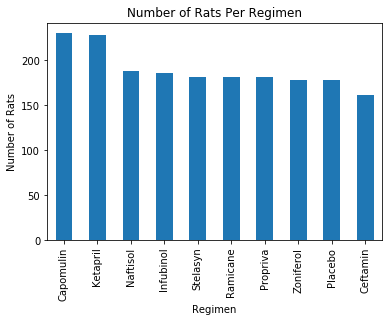

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

counts = data["Drug Regimen"].value_counts()

treatments = {"Regimen": regimens, "Counts": counts}

treatments
    
treatmentdf = pd.DataFrame(treatments)
regimenpd = treatmentdf.plot(x="Regimen",kind="bar", legend = False, title="Number of Rats Per Regimen")
plt.ylabel("Number of Rats")
plt.show()

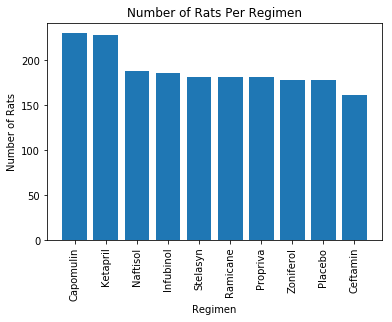

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(regimens, counts)
plt.xticks(rotation='vertical')
plt.title("Number of Rats Per Regimen")
plt.xlabel("Regimen")
plt.ylabel("Number of Rats")
plt.show()

## Pie plots

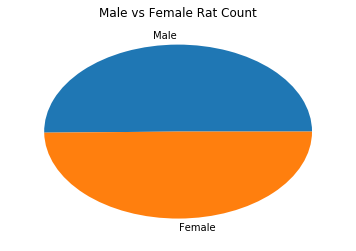

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = mouse_metadata["Sex"].value_counts()
genders = mouse_metadata["Sex"].unique()
genderdict = {"Gender": genders, "Count": gender_count}
df = pd.DataFrame(genderdict)
df.plot(x="Gender", y="Count", kind="pie", legend=False)
plt.title("Male vs Female Rat Count")
plt.ylabel("")
plt.show()

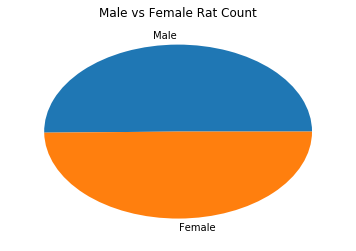

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_count, labels=genders)
plt.title("Male vs Female Rat Count")
plt.show()

## Quartiles, outliers and boxplots

In [78]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#mice = data["Mouse ID"].unique()
tumor_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

for regimen in tumor_regimen:
    cond1 = data["Drug Regimen"] == regimen
    reduced = data[cond1]
    mice = reduced["Mouse ID"].unique()
    print(mice)
    for mouse in mice:
        tumor = []
        cond = data["Mouse ID"] == mouse
        reduced2 = data[cond]
        res = reduced2["Tumor Volume (mm3)"]
        tumor.append(res.iget(-1))
        tumor
print(len(tumor))

['b128' 'j246' 'r554' 's185' 'b742' 'x401' 'l509' 's710' 'r157' 'u364'
 'j119' 'v923' 'w914' 'i738' 'r944' 'y793' 'g316' 'g288' 'l897' 'w150'
 't565' 'i557' 'm957' 'f966' 'm601']


AttributeError: 'Series' object has no attribute 'iget'

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

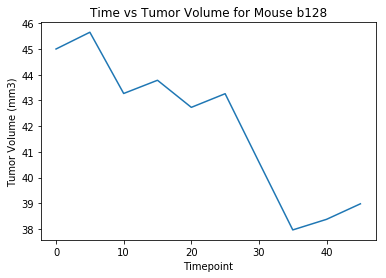

In [75]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capmouse = "b128"
cond = data["Mouse ID"] == capmouse
time = []
volume = []
col = ["Timepoint", "Tumor Volume (mm3)"]
reducedcap = data[cond][col]
reducedcap = reducedcap.set_index("Timepoint")

plt.plot(reducedcap)
plt.title("Time vs Tumor Volume for Mouse " + capmouse)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [83]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cond1 = data["Drug Regimen"] == "Capomulin"
cols = ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]
reduced = data[cond1][cols]
print(reduced)

     Mouse ID  Weight (g)  Tumor Volume (mm3)
0        b128          22           45.000000
1        b128          22           45.651331
2        b128          22           43.270852
3        b128          22           43.784893
4        b128          22           42.731552
5        b128          22           43.262145
6        b128          22           40.605335
7        b128          22           37.967644
8        b128          22           38.379726
9        b128          22           38.982878
1673     j246          21           45.000000
1674     j246          21           45.641438
1675     j246          21           46.408361
1676     j246          21           43.312654
1677     j246          21           44.020370
1678     j246          21           44.555226
1679     j246          21           38.044082
1680     j246          21           38.753265
1681     r554          17           45.000000
1682     r554          17           45.781746
1683     r554          17         

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen